# "Simple Does It" Weakly Supervised Instance Segmentation (Testing)

This notebook performs testing of the SDI Grabcut weakly supervised model for **instance segmentation**. Following the instructions provided in Section "6. Instance Segmentation Results" of the "Simple Does It" paper, we use the Berkeley-augmented Pascal VOC segmentation dataset that provides per-instance segmentation masks for VOC2012 data. 

The SDI Grabcut testing is done using a model trained in the ["Simple Does It" Grabcut Training for Instance Segmentation](model_train.ipynb) notebook, so make sure you've run that notebook first! We test the model on the **validation** split of the Berkeley-augmented dataset.

The Berkley augmented dataset can be downloaded from [here](
http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/semantic_contours/benchmark.tgz).

In [1]:
""""
model_test.ipynb

SDI Grabcut weakly supervised model trainer (instance segmentation)

Written by Phil Ferriere

Licensed under the MIT License (see LICENSE for details)

Based on:
  - https://github.com/scaelles/OSVOS-TensorFlow/blob/master/osvos_parent_demo.py
    Written by Sergi Caelles (scaelles@vision.ee.ethz.ch)
    This file is part of the OSVOS paper presented in:
      Sergi Caelles, Kevis-Kokitsi Maninis, Jordi Pont-Tuset, Laura Leal-Taixe, Daniel Cremers, Luc Van Gool
      One-Shot Video Object Segmentation
      CVPR 2017
    Unknown code license
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sys
import tensorflow as tf
slim = tf.contrib.slim

from IPython.display import Image

In [2]:
# Import model files
import model
from dataset import BKVOCDataset

## Configuration

In [3]:
# Parameters
gpu_id = 0
# Modify the value below to match the value of max_training_iters_3 in the training notebook!
max_training_iters = 50000

# Model paths
segnet_stream = 'weak'
ckpt_name = 'vgg_16_4chan_' + segnet_stream
ckpt_path = 'models/' + ckpt_name + '/' + ckpt_name + '.ckpt-' + str(max_training_iters)

## Dataset load

In [4]:
# Load the Berkeley-augmented Pascal VOC 2012 segmentation dataset
if sys.platform.startswith("win"):
    dataset_root = "E:/datasets/bk-voc/benchmark_RELEASE/dataset"
else:
    dataset_root = '/media/EDrive/datasets/bk-voc/benchmark_RELEASE/dataset'
dataset = BKVOCDataset(phase='test', dataset_root=dataset_root)

In [5]:
# Display dataset configuration
dataset.print_config()


Configuration:
  in_memory            False
  data_aug             False
  use_cache            False
  use_grabcut_labels   False
  phase                test
  samples              6671


## Test the model

In [6]:
with tf.Graph().as_default():
    with tf.device('/gpu:' + str(gpu_id)):
        model.test(dataset, ckpt_path, dataset.pred_masks_path, dataset.img_pred_masks_path, segnet_stream)

INFO:tensorflow:Restoring parameters from models/vgg_16_4chan_weak/vgg_16_4chan_weak.ckpt-50000


Saving predictions as PNGs: 100%|###########| 6671/6671 [05:52<00:00, 18.95it/s]


## Visualize the results

In [7]:
# Combine original images with predicted instance masks
dataset.combine_images_with_predicted_masks()

Combining JPGs with predictions: 100%|######| 6671/6671 [01:46<00:00, 62.45it/s]


### Pretty good

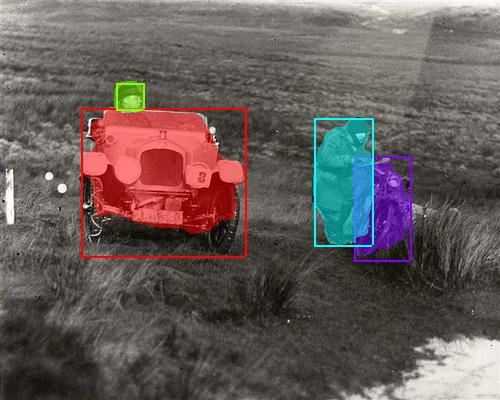

In [9]:
Image(dataset.img_pred_masks_path + '/2008_000203.jpg')

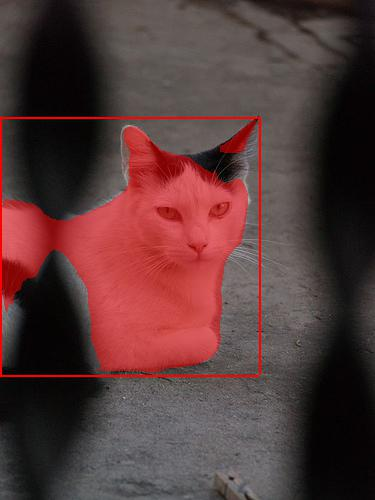

In [10]:
Image(dataset.img_pred_masks_path + '/2008_000581.jpg')

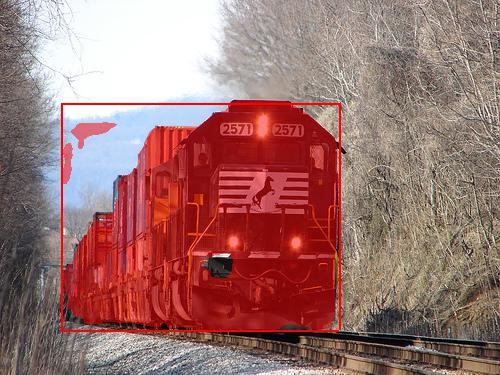

In [11]:
Image(dataset.img_pred_masks_path + '/2008_000657.jpg')

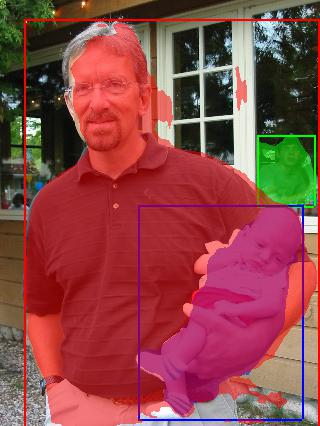

In [12]:
Image(dataset.img_pred_masks_path + '/2008_000727.jpg')

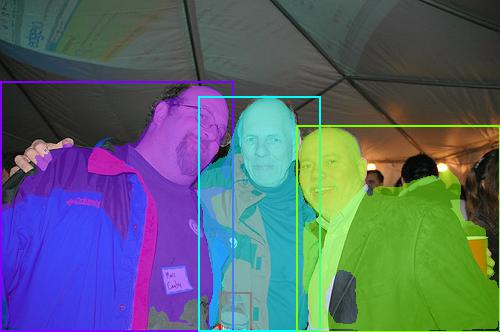

In [13]:
Image(dataset.img_pred_masks_path + '/2008_000795.jpg')

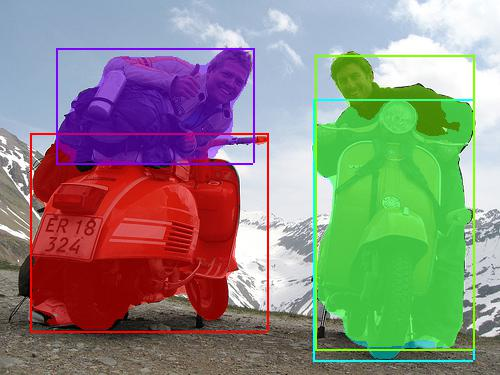

In [14]:
Image(dataset.img_pred_masks_path + '/2008_000811.jpg')

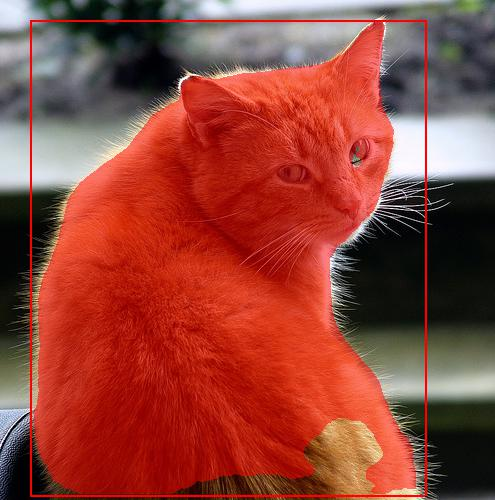

In [15]:
Image(dataset.img_pred_masks_path + '/2008_000839.jpg')

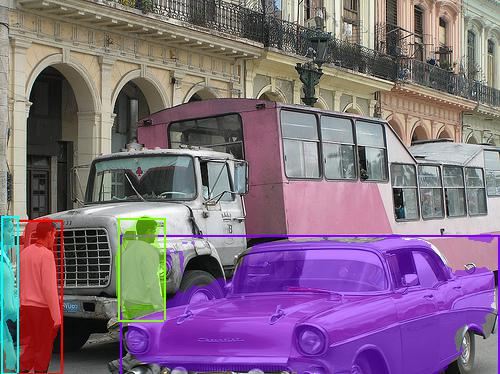

In [16]:
Image(dataset.img_pred_masks_path + '/2008_001867.jpg')

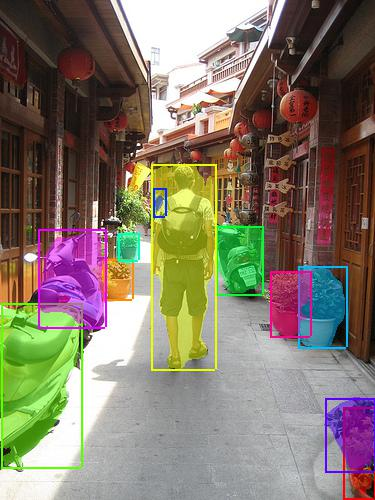

In [17]:
Image(dataset.img_pred_masks_path + '/2008_002191.jpg')

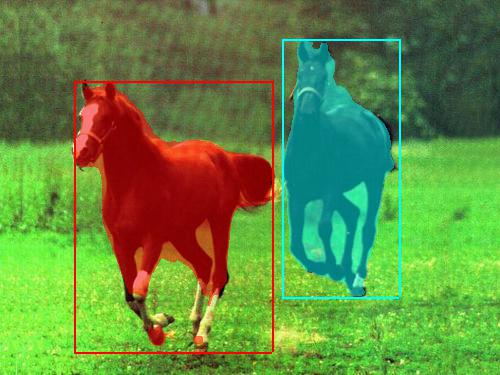

In [18]:
Image(dataset.img_pred_masks_path + '/2008_003055.jpg')

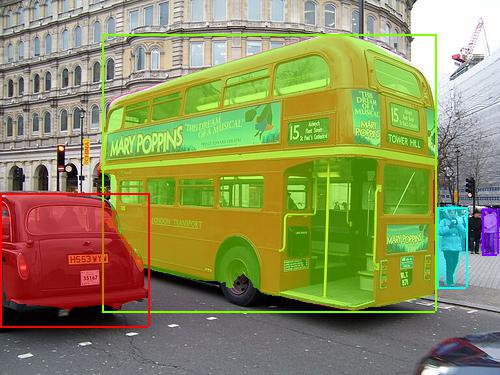

In [19]:
Image(dataset.img_pred_masks_path + '/2008_003141.jpg')

### Not so great

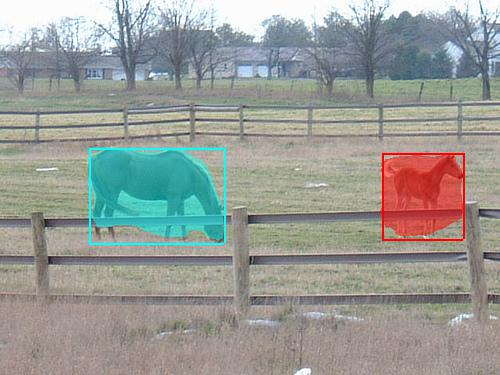

In [20]:
Image(dataset.img_pred_masks_path + '/2008_000219.jpg')

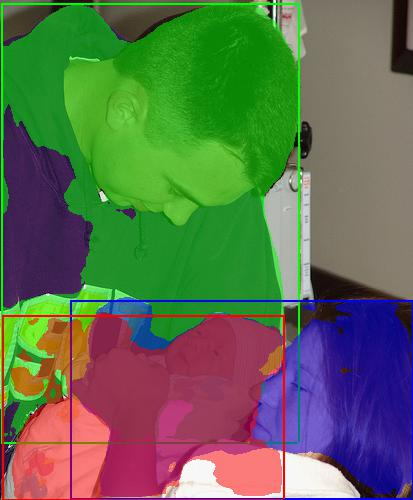

In [21]:
Image(dataset.img_pred_masks_path + '/2008_000553.jpg')

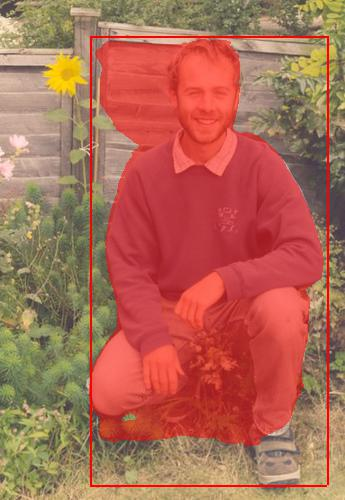

In [22]:
Image(dataset.img_pred_masks_path + '/2008_000825.jpg')

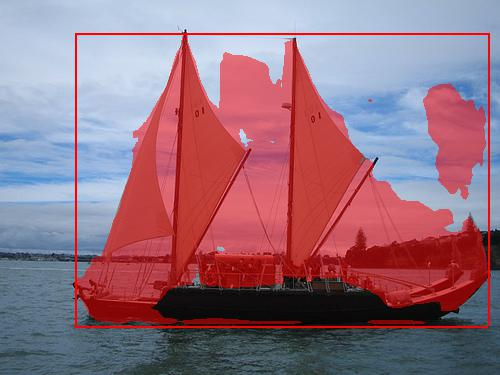

In [23]:
Image(dataset.img_pred_masks_path + '/2008_000957.jpg')

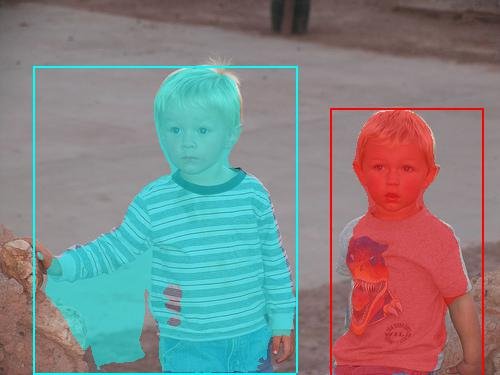

In [24]:
Image(dataset.img_pred_masks_path + '/2008_001113.jpg')

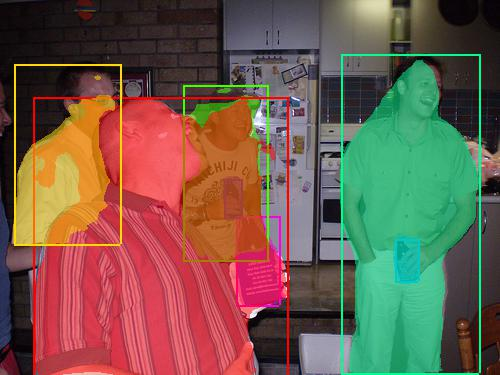

In [25]:
Image(dataset.img_pred_masks_path + '/2008_001199.jpg')

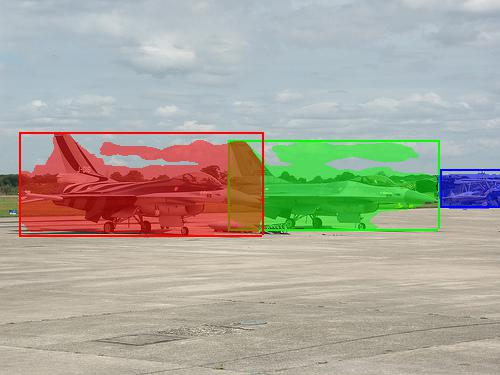

In [26]:
Image(dataset.img_pred_masks_path + '/2008_002673.jpg')